In [1]:
from PIL import Image
import cv2
import numpy as np
import requests

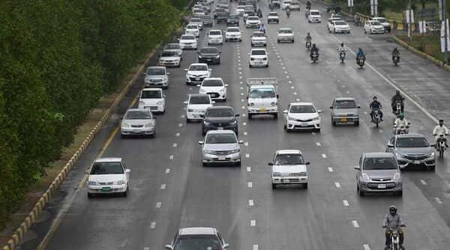

In [2]:
#Reading the Image from url
image=Image.open(requests.get("https://images.livemint.com/img/2022/08/04/600x338/PAKISTAN-ECONOMY-IMPORTS-1_1653543526549_1659575165352_1659575165352.jpg",stream=True).raw)
image=image.resize((450,250))
image_arr=np.array(image)
image

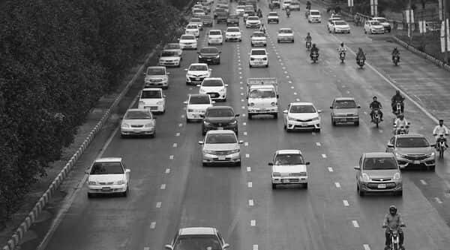

In [3]:
#Grayscale
grey=cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

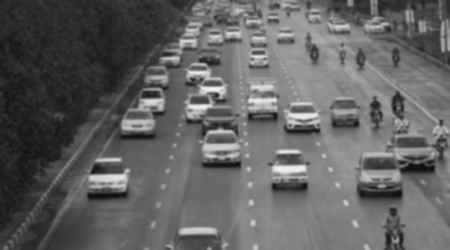

In [4]:
#Gaussian Blur
blur=cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

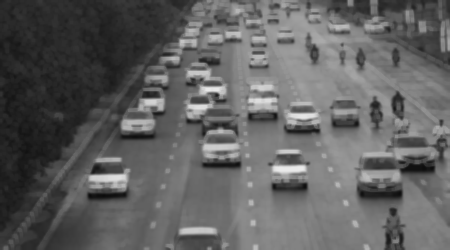

In [5]:
#Dilation
erode=cv2.erode(blur,np.ones((3,3)))
dilated=cv2.dilate(erode,np.ones((3,3)))
Image.fromarray(dilated)

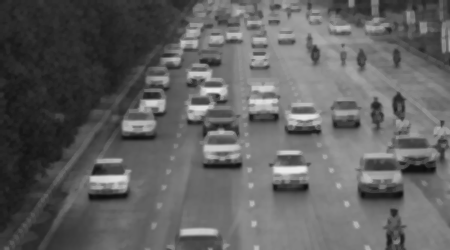

In [6]:
#Morphology-Ex, structuring element
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
closing=cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernel)
Image.fromarray(closing)

In [8]:
#Detecting cars using car cascade
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[303,   8,  23,  23],
       [222,  10,  24,  24],
       [242,  13,  22,  22],
       [327,  17,  27,  27],
       [ 98, 132,  28,  28],
       [272,  26,  27,  27],
       [247,  30,  25,  25],
       [220,  27,  25,  25],
       [187,  82,  30,  30],
       [238,  41,  43,  43],
       [394, 136,  52,  52],
       [ 77, 161,  57,  57],
       [344, 148,  73,  73],
       [255, 145,  70,  70],
       [321,  94,  51,  51],
       [276,  97,  54,  54],
       [186, 120,  72,  72],
       [113, 108,  47,  47],
       [236,  84,  56,  56]])

19  cars found


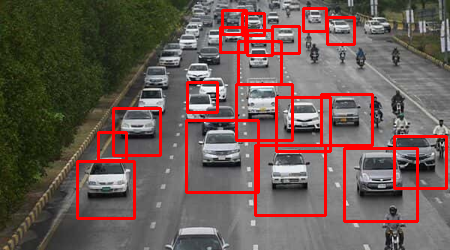

In [9]:
#Drawing bounding box on contours
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [27]:
#Detecting cars using car cascade
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)

cap = cv2.VideoCapture(1)
cap = cv2.VideoCapture('cars.mp4')
while True:
    ret, frame = cap.read()
    image_arr=np.array(frame)
    grey=cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
    Image.fromarray(grey)
    blur=cv2.GaussianBlur(grey,(5,5),0)
    Image.fromarray(blur)
    erode=cv2.erode(blur,np.ones((3,3)))
    dilated=cv2.dilate(erode,np.ones((3,3)))
    Image.fromarray(dilated)
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    closing=cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernel)
    Image.fromarray(closing)
    cars = car_cascade.detectMultiScale(closing, 1.1, 1)
    cnt = 0
    for (x,y,w,h) in cars:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        cnt += 1
        cv2.imshow('video', frame)
        #crop_img = frame[y:y+h,x:x+w]
        cv2.putText(frame, "Cars Detected: " + str(cnt), (50, 90), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 170, 0), 2)
    print(cnt, " cars found")
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
cap.release()
    #Image.fromarray(image_arr)
    

8  cars found
7  cars found
7  cars found
7  cars found
8  cars found
7  cars found
7  cars found
7  cars found
7  cars found
7  cars found
8  cars found
9  cars found
8  cars found
9  cars found
7  cars found
10  cars found
8  cars found
9  cars found
9  cars found
9  cars found
8  cars found
8  cars found
8  cars found
9  cars found
10  cars found
10  cars found
9  cars found
9  cars found
9  cars found
11  cars found
8  cars found
8  cars found
11  cars found
7  cars found
9  cars found
10  cars found
8  cars found
9  cars found
10  cars found
9  cars found
10  cars found
11  cars found
11  cars found
11  cars found
11  cars found
10  cars found
8  cars found
7  cars found
9  cars found
10  cars found
10  cars found
9  cars found
8  cars found
9  cars found
11  cars found
8  cars found
12  cars found
12  cars found
13  cars found
10  cars found
9  cars found
10  cars found
12  cars found
11  cars found
10  cars found
11  cars found
9  cars found
12  cars found
13  cars found
10  car